<a href="https://colab.research.google.com/github/gourab-sinha/Machine_Learning/blob/master/KNN_Classifier/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors Algorithm

In [0]:
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:
b_cancer = datasets.load_breast_cancer()
X_train,X_test,Y_train,Y_test = train_test_split(b_cancer.data,b_cancer.target,test_size=0.25,random_state=1)

In [3]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [4]:
knn_classifier.score(X_test,Y_test)

0.9370629370629371

In [0]:
iris = datasets.load_iris()
xtrain,xtest,ytrain,ytest = train_test_split(iris.data,iris.target,test_size=0.25)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
clf = LinearRegression()

In [0]:
cross_val_score(clf,xtrain,ytrain,cv = KFold(3,True,0))

array([0.89740528, 0.91485845, 0.94075909])

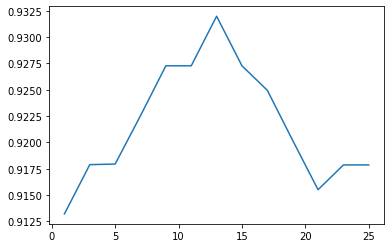

In [0]:
class KNNClassifier:

  # train function returns the best neighbor number
  def train(self,X_train,Y_train):
    x_axis = []
    y_axis = []
    best_accurecy = 0 
    k_neighbor = 0
    for i in range(1,26,2):
      clf = KNeighborsClassifier(n_neighbors=i)
      score = cross_val_score(clf,X_train,Y_train)
      x_axis.append(i)
      y_axis.append(score.mean())
      if(best_accurecy<score.mean()):
        best_accurency = score.mean()
        k_neighbor = i

    plt.plot(x_axis,y_axis)
    plt.show()
    return k_neighbor

  # predict the majority neigbor class
  def __predict_one(self,X_train,Y_train,X,K):
    distance = []
    for i in range(len(X_train)):
      euclids_distance = ((X_train[i,:] - X)**2).sum()
      distance.append([euclids_distance,i])
    
    distance = sorted(distance)
    targets = []
    for i in range(K):
      index = distance[i][1]
      targets.append(Y_train[index])
    
    return Counter(targets).most_common(1)[0][0]
    
  # return prediction for all test data points
  def predict(self,X_train,Y_train,X_test,K):
    Y_predict = []
    for X in X_test:
      Y = self.__predict_one(X_train,Y_train,X,K)
      Y_predict.append(Y)
    
    return Y_predict

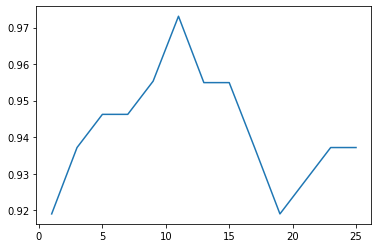

25

In [30]:
iris = datasets.load_iris()
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size=0.25)
clf = KNNClassifier()
K = clf.train(X_train,Y_train)
K

In [0]:
Y_predict = clf.predict(X_train,Y_train,X_test,K)

In [32]:
print(Y_predict)

[0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0]


In [33]:
accuracy_score(Y_test,Y_predict)

1.0